Agrupar los datos con clustering jerárquico y visualizar los resultados con un dendrograma.

Liberías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

1. Carga el CSV.

In [ ]:
df = pd.read_csv('hierarchical.csv')
df.head(2)

,X,Y
0,1.0,2.0
1,1.5,1.8


2. Normaliza los datos si lo consideras necesario.

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

3. Genera el dendrograma con scipy.cluster.hierarchy.dendrogram.



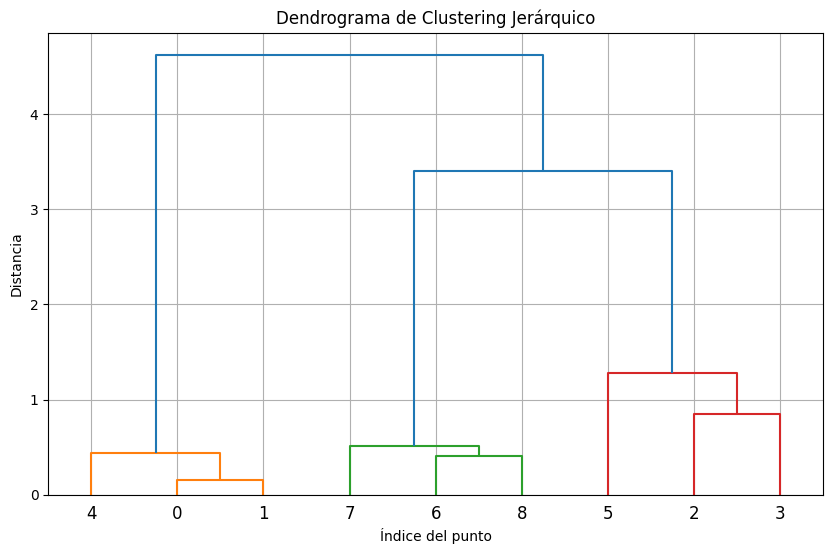

In [ ]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice del punto')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()

4. Aplica el modelo de agrupamiento jerárquico (AgglomerativeClustering) con n_clusters=3.


In [ ]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

5. Visualiza los clústeres con un gráfico de dispersión.



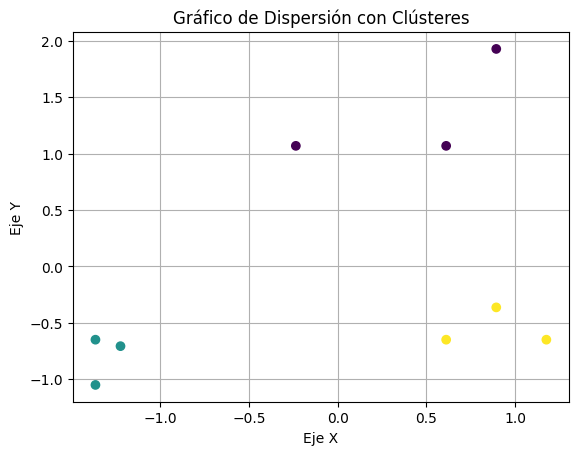

In [ ]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=model.labels_)
plt.title('Gráfico de Dispersión con Clústeres')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.show()

Extraer los datos de cada cluster

In [ ]:
df['Cluster'] = model.labels_

In [ ]:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

In [ ]:
cluster_1

,X,Y,Cluster
0,1.0,2.0,1
1,1.5,1.8,1
4,1.0,0.6,1


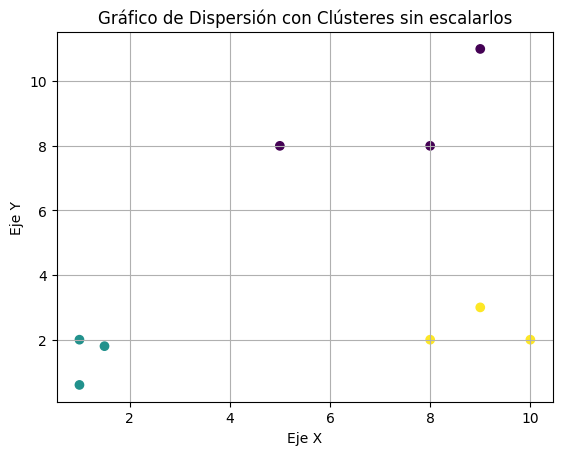

In [ ]:
plt.scatter(df['X'], df['Y'], c=model.labels_)
# plt.axis([0,2,0,2.5])
plt.title('Gráfico de Dispersión con Clústeres sin escalarlos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.show()